In [3]:
import pandas as pd

In [125]:
batting = pd.read_csv("https://raw.githubusercontent.com/zoberender/Python-Group-Project/master/Batting.csv")
batting["1B"] = batting["H"] - batting["2B"] - batting["3B"] - batting["HR"]
cut_label = ['None','Dead Ball','Live Ball','Integration','Expansion','Free Agency','Steroid','Post-Steroid']
cut_bins = [0,1900,1919,1941,1960,1976,1993,2005,max(batting['yearID'])]
batting['Era'] = pd.cut(batting['yearID'], bins=cut_bins, labels = cut_label)
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B,Era
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0,None
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,26,None
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,31,None
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,30,None
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,25,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Post-Steroid
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Post-Steroid
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Post-Steroid
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Post-Steroid


In [46]:
%matplotlib inline

import matplotlib as mp
import matplotlib.pyplot as plt

In [112]:
battingTotals = batting.groupby(batting['yearID'],as_index = False)['G',	'AB',	'R',	'H',	'1B',   '2B',	'3B',	'HR',	'RBI',	'SB',	'CS',	'BB',	'SO',	'IBB',	'HBP',	'SH',	'SF',	'GIDP'].agg('sum')
battingTotals = battingTotals[battingTotals['yearID'] >= 1961]
battingTotals["AVG"] = round(battingTotals["H"] / battingTotals["AB"],3)
battingTotals.head(10)

,yearID,G,AB,R,H,1B,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
90,1961,36336,97032,12942,25066,17607,3975,754,2730,12062.0,1046.0,599.0,9897,14947.0,732.0,573.0,1305.0,761.0,2232.0,0.258
91,1962,41649,110688,14461,28521,20354,4313,853,3001,13546.0,1348.0,701.0,10936,17567.0,818.0,709.0,1361.0,846.0,2487.0,0.258
92,1963,40796,109814,12780,27043,19450,4098,791,2704,11904.0,1236.0,763.0,9591,18773.0,933.0,714.0,1448.0,769.0,2256.0,0.246
93,1964,41431,110464,13124,27669,19877,4270,760,2762,12233.0,1176.0,719.0,9621,19212.0,1015.0,694.0,1462.0,739.0,2394.0,0.250
94,1965,42403,109739,12946,26952,19278,4199,787,2688,12012.0,1449.0,786.0,10036,19283.0,1130.0,720.0,1488.0,766.0,2363.0,0.246
95,1966,41804,109467,12900,27207,19524,4120,820,2743,11998.0,1455.0,926.0,9331,18805.0,1088.0,682.0,1455.0,742.0,2355.0,0.249
96,1967,41905,109205,12210,26464,19291,4082,792,2299,11265.0,1373.0,940.0,9665,19413.0,1295.0,751.0,1480.0,738.0,2245.0,0.242
97,1968,40986,108622,11109,25710,19149,3869,697,1995,10309.0,1515.0,931.0,9156,19143.0,1223.0,778.0,1507.0,753.0,2217.0,0.237
98,1969,50206,131287,15850,32581,23773,4840,849,3119,14662.0,1850.0,1118.0,13429,22473.0,1436.0,882.0,1669.0,914.0,2900.0,0.248
99,1970,50632,132140,16880,33555,23964,5235,927,3429,15762.0,1908.0,1078.0,13727,22374.0,1464.0,825.0,1630.0,990.0,3023.0,0.254


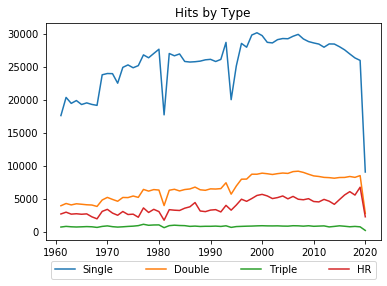

In [113]:
Singles = battingTotals["1B"]
Doubles = battingTotals["2B"]
Triples = battingTotals["3B"]
HR = battingTotals["HR"]
year = battingTotals["yearID"]
plt.plot(year,Singles, label = 'Single')
plt.plot(year,Doubles,label = 'Double')
plt.plot(year,Triples,label='Triple')
plt.plot(year,HR,label='HR')
plt.title("Hits by Type")
plt.legend(bbox_to_anchor = (0,-0.2,1,1.5), loc='lower left', mode="expand", ncol=4)

In [122]:
EraTotals = round(batting.groupby(batting['Era'],as_index = False)['G',	'AB',	'R',	'H',	'1B',   '2B',	'3B',	'HR',	'RBI',	'SB',	'CS',	'BB',	'SO',	'IBB',	'HBP',	'SH',	'SF',	'GIDP'].agg('sum'),2)

EraTotals.head(10)

,Era,G,AB,R,H,1B,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,None,382908,1483477,241927,392662,304639,55579,23295,9149,175153.0,56777.0,805.0,106606,97043.0,0.0,11870.0,7921.0,0.0,542.0
1,Dead Ball,494800,1592133,189070,404403,316980,57599,22448,7376,157143.0,56773.0,4252.0,130867,164878.0,0.0,14143.0,52801.0,0.0,0.0
2,Live Ball,609651,1881223,262729,527499,385235,92167,23859,26238,241378.0,25906.0,13926.0,171441,168759.0,0.0,9527.0,48363.0,0.0,11619.0
3,Integration,569896,1603607,204563,415095,301573,66559,13919,33044,190946.0,15402.0,8479.0,167243,191518.0,4360.0,8002.0,25723.0,4776.0,37102.0
4,Expansion,726647,1911447,228190,479189,348867,73697,13074,43551,212208.0,28028.0,16214.0,181508,311542.0,19112.0,11874.0,25315.0,14271.0,42496.0
5,Free Agency,952756,2397768,303848,622329,441809,107836,15941,56743,284911.0,53200.0,26228.0,228716,378053.0,22429.0,13518.0,27951.0,20875.0,53072.0
6,Steroid,777547,1894860,266986,505292,336035,99176,10615,59466,253410.0,34947.0,15534.0,189075,355875.0,14758.0,18819.0,18970.0,16165.0,43113.0
7,Post-Steroid,1005802,2383409,313488,612211,403097,122099,12517,74498,298767.0,39586.0,14929.0,221711,525838.0,15464.0,24362.0,18643.0,18263.0,53223.0


In [123]:
Singles = EraTotals["1B"]
Doubles = EraTotals["2B"]
Triples = EraTotals["3B"]
HR = EraTotals["HR"]
year = EraTotals["yearID"]
plt.plot(year,Singles, label = 'Single')
plt.plot(year,Doubles,label = 'Double')
plt.plot(year,Triples,label='Triple')
plt.plot(year,HR,label='HR')
plt.title("Hits by Era and Type")
plt.legend(bbox_to_anchor = (0,-0.2,1,1.5), loc='lower left', mode="expand", ncol=4)

            Era        G        AB         R         H        1B        2B  \
0          None   382908  3.874239  0.631815  1.025473  0.795593  0.145150   
1     Dead Ball   494800  3.217730  0.382114  0.817306  0.640622  0.116409   
2     Live Ball   609651  3.085738  0.430950  0.865247  0.631894  0.151180   
3   Integration   569896  2.813859  0.358948  0.728370  0.529172  0.116791   
4     Expansion   726647  2.630503  0.314031  0.659452  0.480105  0.101421   
5   Free Agency   952756  2.516665  0.318915  0.653188  0.463717  0.113183   
6       Steroid   777547  2.436972  0.343370  0.649854  0.432173  0.127550   
7  Post-Steroid  1005802  2.369660  0.311680  0.608679  0.400772  0.121395   

         3B        HR       RBI        SB        CS        BB        SO  \
0  0.060837  0.023893  0.457428  0.148278  0.002102  0.278412  0.253437   
1  0.045368  0.014907  0.317589  0.114739  0.008593  0.264485  0.333222   
2  0.039136  0.043038  0.395928  0.042493  0.022843  0.281212  0.276812 